In [ ]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("KFUPM-JRCAI/arabic-generated-abstracts")

/opt/homebrew/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Phase 1: Project Setup & Data Acquisition

In [2]:
import pandas as pd

In [6]:
by_polishing = ds["by_polishing"]
from_title = ds["from_title"] 
from_title_and_content = ds["from_title_and_content"]


In [7]:
df1 = pd.DataFrame(by_polishing)
df2 = pd.DataFrame(from_title)
df3 = pd.DataFrame(from_title_and_content)
df = pd.concat([df1, df2, df3], ignore_index=True)

In [8]:
df.to_csv("arabic-generated-abstracts", index=False)

In [9]:
dfs = pd.read_csv("../data/raw/arabic-generated-abstracts.csv")

In [10]:
dfs.head()

,original_abstract,allam_generated_abstract,jais_generated_abstract,llama_generated_abstract,openai_generated_abstract
0,كثيرا ما ارتبطت المصادر التاريخية في الأندلس خ...,يتناول هذا البحث موضوع التعليم بين النساء الأن...,تدرس هذه الدراسة دور المرأة في التعليم في الأن...,يُقدم هذا البحث دراسة شاملة حول حالة التعليم ع...,صور نظام التعليم عند المرأة الأندلسية تستند إل...
1,يعد العامل الثقافي احد ابرز الاسباب التي يعزى ...,يتناول هذا البحث دراسة انهيار دولة الموحدين من...,كان العامل الثقافي من بين الأسباب الرئيسية الت...,يعد العامل الثقافي أحد أبرز الأسباب التي يعزى ...,انهيار دولة الموحدين يعود بشكل كبير للعوامل ال...
2,شكلت تلك الجهود والمساعي الرائدة التي قام بها ...,هدفت هذه الدراسة إلى تسليط الضوء على جهود قادة...,تدرس هذه الدراسة جهود قادة الثورة الجزائرية خل...,شكلت الجهود التي بذلها قادة الثورة الجزائرية خ...,جهود قادة الثورة الجزائرية خلال المرحلة الأولى...
3,يقوم المقال على اشكالية الضرائب الغير شرعية في...,يتناول هذا البحث إشكالية الضرائب غير الشرعية ف...,تدرس المقالة مشكلة الضرائب غير الشرعية في مراح...,يقوم البحث على دراسة الضرائب غير الشرعية في دو...,المقال يناقش قضية الضرائب غير الشرعية في دولتي...
4,تتفق المصادر التاريخية المتوفرة حول موضوع تطور...,تتناول هذه الدراسة حركة الانتصار للحريات الديم...,حركة انتصار الحريات الديمقراطية (MTLD)، وهي حر...,تُظهر المصادر التاريخية المتاحة حول تطور الحرك...,حركة انتصار الحريات الديمقراطية (MTLD) في الجز...


In [11]:
dfs.describe()

,original_abstract,allam_generated_abstract,jais_generated_abstract,llama_generated_abstract,openai_generated_abstract
count,8388,8388,8388,8388,8388
unique,2992,8388,8385,8388,8388
top,كثيرا ما ارتبطت المصادر التاريخية في الأندلس خ...,يتناول هذا البحث موضوع التعليم بين النساء الأن...,، ، ، ، ، ، ، ، ، ، ، ، ، ، ، ، ، ، ، ، ، ، ، ...,يُقدم هذا البحث دراسة شاملة حول حالة التعليم ع...,صور نظام التعليم عند المرأة الأندلسية تستند إل...
freq,3,1,4,1,1


In [12]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8388 entries, 0 to 8387
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   original_abstract          8388 non-null   object
 1   allam_generated_abstract   8388 non-null   object
 2   jais_generated_abstract    8388 non-null   object
 3   llama_generated_abstract   8388 non-null   object
 4   openai_generated_abstract  8388 non-null   object
dtypes: object(5)
memory usage: 327.8+ KB


In [13]:
# Number of missing values per column
df.isnull().sum()

original_abstract            0
allam_generated_abstract     0
jais_generated_abstract      0
llama_generated_abstract     0
openai_generated_abstract    0
dtype: int64

In [ ]:
# Note: there is no missing values 

In [ ]:
# Combinig all text columns into "text" column, create a new column "human vs. AI-generated".
df_combine = pd.melt(dfs,
                  value_vars=['original_abstract','allam_generated_abstract' , 'jais_generated_abstract' , 'llama_generated_abstract' , 'openai_generated_abstract'],
                  var_name='human vs. AI-generated',
                  value_name='text' )
df_combine.head()

,human vs. AI-generated,text
0,original_abstract,كثيرا ما ارتبطت المصادر التاريخية في الأندلس خ...
1,original_abstract,يعد العامل الثقافي احد ابرز الاسباب التي يعزى ...
2,original_abstract,شكلت تلك الجهود والمساعي الرائدة التي قام بها ...
3,original_abstract,يقوم المقال على اشكالية الضرائب الغير شرعية في...
4,original_abstract,تتفق المصادر التاريخية المتوفرة حول موضوع تطور...


In [ ]:
# Here converting "human vs. AI-generated" values into binary "human or ai_generated"
df_combine['human vs. AI-generated'] = df_combine['human vs. AI-generated'].replace({
    'original_abstract': 'human',
    'allam_generated_abstract': 'ai_generated',
    'llama_generated_abstract': 'ai_generated',
    'openai_generated_abstract': 'ai_generated',
    'jais_generated_abstract': 'ai_generated'
})

In [16]:
df_combine.head()

,human vs. AI-generated,text
0,human,كثيرا ما ارتبطت المصادر التاريخية في الأندلس خ...
1,human,يعد العامل الثقافي احد ابرز الاسباب التي يعزى ...
2,human,شكلت تلك الجهود والمساعي الرائدة التي قام بها ...
3,human,يقوم المقال على اشكالية الضرائب الغير شرعية في...
4,human,تتفق المصادر التاريخية المتوفرة حول موضوع تطور...


In [17]:
# Check Duplicated Texts
df_combine.duplicated().sum()

np.int64(5399)

In [18]:
# Check Distribution of Data
df_combine["human vs. AI-generated"].value_counts()

human vs. AI-generated
ai_generated    33552
human            8388
Name: count, dtype: int64

In [19]:
# Check Missing Values 
df_combine.isnull().sum()

human vs. AI-generated    0
text                      0
dtype: int64

In [21]:
df_combine.to_csv("processed-arabic-generated-abstrcts", index=False)

## Phase 2: Data Preprocessing & Exploratory Data Analysis (EDA)

### Task 2.1: Normalization, removing diacritics, stop word removal, and steeming

In [1]:
# ------------------ Task 2.1 ----------------------
import re

def normalize_arabic(text):
    # Normalize Alif forms
    text = re.sub("[إأآا]", "ا", text)
    
    # Normalize Alif Maqsura to Ya
    text = re.sub("ى", "ي", text)
    
    # Remove Tatweel
    text = re.sub("ـ", "", text)
    
    # Remove diacritics
    text = re.sub("[ًٌٍَُِّْ]", "", text)
    
    # Remove non-Arabic characters
    text = re.sub("[^\u0600-\u06FF\s\u0660-\u0669]", " ", text)
    
    # Collapse extra spaces
    text = re.sub("\s+", " ", text).strip()
    
    text = re.sub("؟", "", text).strip()
    return text


# Example
sample = "????  ؟إسلامٌ عَلى آلـــيٍّ! لؤلؤ!!"
print(normalize_arabic(sample))

اسلام علي الي لؤلؤ


In [35]:
df = pd.read_csv("/Users/mo-alnajjar/Documents/Advanced Data Analytic Techniques/Data Analytic Final Project/data/processed/processed-arabic-generated-abstrcts.csv", index_col=0)

In [36]:
df["norm_text"] = df["text"].apply(normalize_arabic)

In [38]:
df = df.drop("text", axis=1)

In [40]:
df.head()

,norm_text
human vs. AI-generated,
human,كثيرا ما ارتبطت المصادر التاريخية في الاندلس خ...
human,يعد العامل الثقافي احد ابرز الاسباب التي يعزي ...
human,شكلت تلك الجهود والمساعي الرائدة التي قام بها ...
human,يقوم المقال علي اشكالية الضرائب الغير شرعية في...
human,تتفق المصادر التاريخية المتوفرة حول موضوع تطور...


In [41]:
df.to_csv("normalize-arabic-generated-abstrcts")

In [31]:
df.drop("Unnamed: 0", axis=1)

,human vs. AI-generated,norm_text
0,human,كثيرا ما ارتبطت المصادر التاريخية في الاندلس خ...
1,human,يعد العامل الثقافي احد ابرز الاسباب التي يعزي ...
2,human,شكلت تلك الجهود والمساعي الرائدة التي قام بها ...
3,human,يقوم المقال علي اشكالية الضرائب الغير شرعية في...
4,human,تتفق المصادر التاريخية المتوفرة حول موضوع تطور...
...,...,...
41935,ai_generated,تعتبر اللغة الشعرية عند المتنبي ظاهرة فريدة في...
41936,ai_generated,يعتبر مفتاح العلوم للسكاكي من ابرز المراجع في ...
41937,ai_generated,البحث يتناول اهمية الاداة اللغوية حتي في الخطا...
41938,ai_generated,يتناول البحث موضوع هوية المعني الشعري في سياق ...


In [34]:
df.to_csv("normalize-arabic-generated-abstrcts", index=False)

### Task 2.2.1: Statistical Analysis include Average word length, sentence length, vocabulary richness (Type-Token Ratio).

In [14]:
df = pd.read_csv("/Users/mo-alnajjar/Documents/Advanced Data Analytic Techniques/Data Analytic Final Project/data/processed/normalize-arabic-generated-abstrcts.csv")


In [15]:
# ------------------ Task 2.2 ----------------------
import numpy as np
import re
# Function calculate avg word length
def avg_word_length(text):
    """
    Calculate the average word length in a given text.

    This function splits the text into words (separated by spaces) 
    and computes the average number of characters per word.

    Args:
        text (str): The input text to analyze.

    Returns:
        float: The average word length. Returns 0 if the text contains no words.
    """
    words = text.split()
    if len(words) == 0:
        return 0
    total_chars = sum(len(w) for w in words)
    return total_chars / len(words)

# Function calculate avg sentence length
def avg_sentence_length(text):
    """
    Calculate the average sentence length in words for a given text.

    This function splits the text into sentences based on punctuation marks 
    (., !, ؟, or !) and computes the average number of words per sentence.

    Args:
        text (str): The input text to analyze.

    Returns:
        float: The average sentence length (in words). Returns 0 if no sentences are found.
    """
    sentences = re.split(r"[.!؟!]", text)
    sentences = [s.strip() for s in sentences if s.strip()]
    if len(sentences) == 0:
        return 0
    total_words = sum(len(s.split()) for s in sentences)
    return total_words / len(sentences)

# Function calculate type token ratio (vocabulary richness)
def type_token_ratio(text):
    """
    Calculate the Type-Token Ratio (TTR) of a given text.

    The TTR measures vocabulary richness by dividing the number of unique words 
    by the total number of words in the text.

    Args:
        text (str): The input text to analyze.

    Returns:
        float: The type-token ratio (unique words / total words). Returns 0 if no words are found.
    """
    words = text.split()
    if len(words) == 0:
        return 0
    unique_words = set(words)
    return len(unique_words) / len(words)

In [16]:
df["norm_text"].apply(avg_word_length)

0        5.000000
1        4.776224
2        5.338235
3        4.921053
4        4.911765
           ...   
41935    5.474227
41936    5.240000
41937    4.870968
41938    5.485981
41939    5.103704
Name: norm_text, Length: 41940, dtype: float64

In [17]:
df["norm_text"].apply(avg_sentence_length)

0        118.0
1        143.0
2        204.0
3        114.0
4        136.0
         ...  
41935     97.0
41936    125.0
41937    124.0
41938    107.0
41939    135.0
Name: norm_text, Length: 41940, dtype: float64

In [18]:
df["norm_text"].apply(type_token_ratio)

0        0.830508
1        0.783217
2        0.750000
3        0.789474
4        0.860294
           ...   
41935    0.886598
41936    0.744000
41937    0.782258
41938    0.822430
41939    0.748148
Name: norm_text, Length: 41940, dtype: float64

### Task 2.2.2: Visualization include word clouds for each class, frequency distributions of top n-grams. 

In [40]:
# Use the arabic_reshaper and python-bidi libraries to reshape and reorder the Arabic text for proper rendering
import arabic_reshaper 
from bidi.algorithm import get_display

In [42]:
def reshape_arabic_text(text):
    """
    Reshape and reorder Arabic text for correct display in visualizations.

    This function uses the `arabic_reshaper` library to connect isolated Arabic 
    characters into their proper contextual forms, and the `python-bidi` library 
    to reorder the text for right-to-left rendering. It is especially useful for 
    preparing Arabic text for visualization tools (e.g., WordCloud, Matplotlib) 
    that do not natively support Arabic shaping.

    Parameters
    ----------
    text : str
        The Arabic text string to be reshaped and reordered.

    Returns
    -------
    str
        The reshaped and bidi-corrected Arabic text, ready for proper display.
    """
    reshaped_text = arabic_reshaper.reshape(text)       # reshape letters
    bidi_text = get_display(reshaped_text)              # correct right-to-left display
    return bidi_text

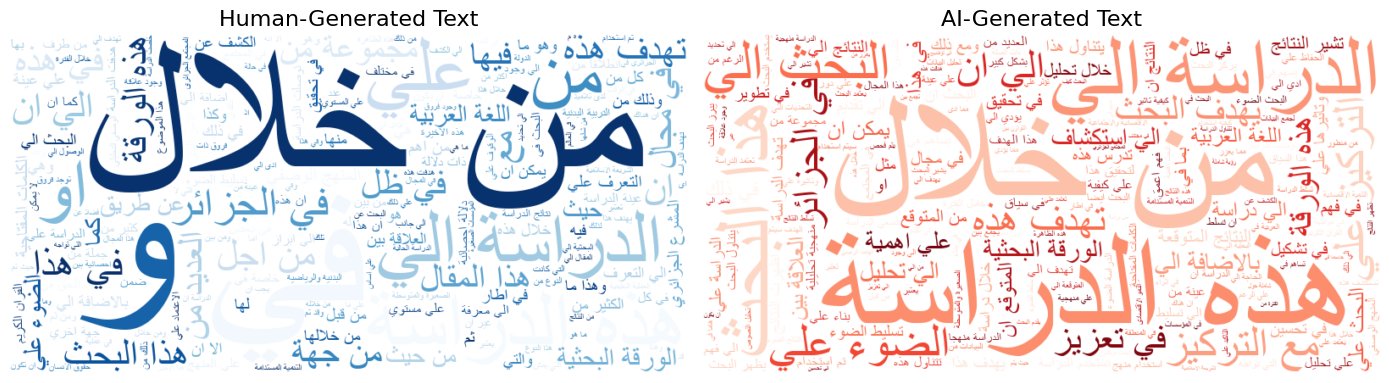

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text for each class
human_text = reshape_arabic_text(" ".join(df[df["human vs. AI_generated"] == "human"]["norm_text"]))
ai_text = reshape_arabic_text(" ".join(df[df["human vs. AI_generated"] == "ai_generated"]["norm_text"]))
font_file = "../src/font/ARIAL.TTF"
# Generate word clouds
wc_human = WordCloud(font_path=font_file, width=800, height=400, background_color="white", colormap="Blues").generate(human_text)
wc_ai = WordCloud(font_path=font_file, width=800, height=400, background_color="white", colormap="Reds").generate(ai_text)

# Plot them side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].imshow(wc_human, interpolation="bilinear")
axes[0].set_title("Human-Generated Text", fontsize=16)
axes[0].axis("off")

axes[1].imshow(wc_ai, interpolation="bilinear")
axes[1].set_title("AI-Generated Text", fontsize=16)
axes[1].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

def plot_top_ngrams(texts, n=20, ngram_range=(1, 1), title="Top n-grams"):
    """
    Plot the most frequent n-grams from Arabic text data with proper letter shaping.

    Parameters
    ----------
    texts : list or pandas.Series
        A collection of Arabic text samples.
    n : int, optional
        The number of top n-grams to display (default is 20).
    ngram_range : tuple, optional
        The n-gram range for CountVectorizer (default is (1, 1)).
    title : str, optional
        The title for the plot.

    Returns
    -------
    None
        Displays a bar chart of the top n-grams.
    """
    
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(texts)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

    df_freq = pd.DataFrame(words_freq, columns=["ngram", "count"])
    df_freq["ngram"] = df_freq["ngram"].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
    plt.figure(figsize=(10, 6))
    sns.barplot(x="count", y="ngram", data=df_freq, palette="viridis")
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("")
    plt.show()

/var/folders/gw/_wfm7cns3rggr171rjmy2wj80000gn/T/ipykernel_42580/3163755205.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="ngram", data=df_freq, palette="viridis")


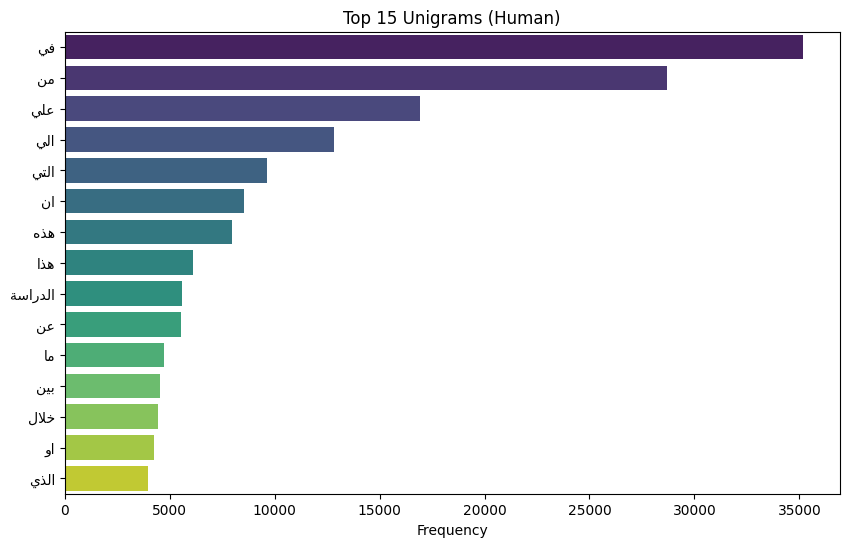

/var/folders/gw/_wfm7cns3rggr171rjmy2wj80000gn/T/ipykernel_42580/3163755205.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="ngram", data=df_freq, palette="viridis")


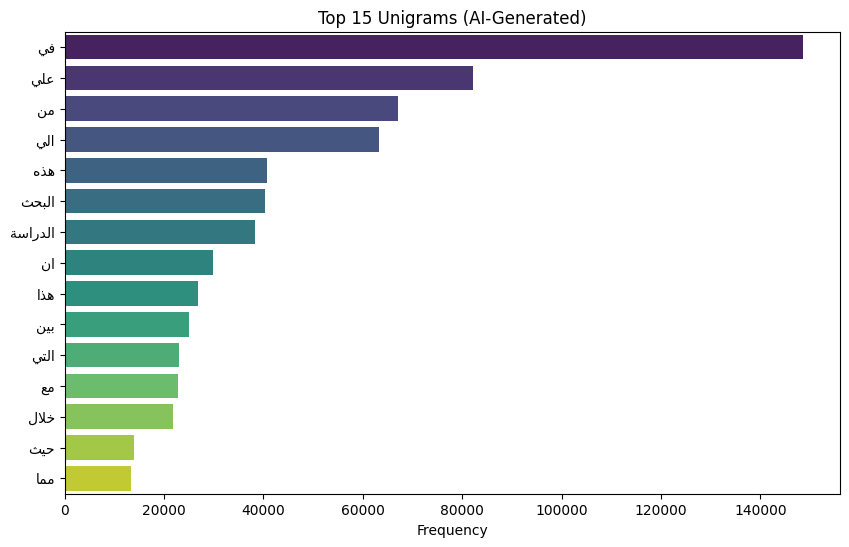

In [55]:
# Top unigrams for Human text
plot_top_ngrams(df[df["human vs. AI_generated"] == "human"]["norm_text"],
                n=15, ngram_range=(1, 1),
                title="Top 15 Unigrams (Human)")

# Top unigrams for AI text
plot_top_ngrams(df[df["human vs. AI_generated"] == "ai_generated"]["norm_text"],
                n=15, ngram_range=(1, 1),
                title="Top 15 Unigrams (AI-Generated)")


### Task 2.2.3: Lexical Analysis include Comparing the use of function words, punctuation, and specific terms.

In [57]:
from collections import Counter

def lexical_analysis(df, text_col, label_col):
    """
    Perform lexical analysis comparing function words, punctuation, 
    and specific term usage between human and AI-generated texts.
    
    Args:
        df (pd.DataFrame): The dataset containing text and labels.
        text_col (str): Column name containing normalized text.
        label_col (str): Column name indicating 'human' or 'ai_generated'.
        
    Returns:
        dict: Comparison of word and punctuation frequencies.
    """

    # Define Arabic function words (you can expand this list)
    function_words = ["في", "من", "على", "أن", "عن", "ما", "قد", "لا", "هو", "هي", "هذا", "ذلك", "كان"]

    # Separate human and AI texts
    human_texts = " ".join(df[df[label_col] == "human"][text_col])
    ai_texts = " ".join(df[df[label_col] == "ai_generated"][text_col])

    # --- Count function words ---
    def count_words(text, word_list):
        return sum(text.count(w) for w in word_list)

    human_func_count = count_words(human_texts, function_words)
    ai_func_count = count_words(ai_texts, function_words)

    # --- Count punctuation ---
    def count_punctuation(text):
        return len(re.findall(r"[.,!?؟؛]", text))

    human_punct_count = count_punctuation(human_texts)
    ai_punct_count = count_punctuation(ai_texts)

    # --- Most common specific terms (optional extension) ---
    def get_top_terms(text, n=10):
        words = re.findall(r"[\u0600-\u06FF]+", text)
        return Counter(words).most_common(n)

    result = {
        "function_words": {
            "human": human_func_count,
            "ai_generated": ai_func_count
        },
        "punctuation": {
            "human": human_punct_count,
            "ai_generated": ai_punct_count
        },
        "top_terms": {
            "human": get_top_terms(human_texts),
            "ai_generated": get_top_terms(ai_texts)
        }
    }

    return result


In [58]:
result = lexical_analysis(df, "norm_text", "human vs. AI_generated")
print(result)

{'function_words': {'human': 288016, 'ai_generated': 924020}, 'punctuation': {'human': 2346, 'ai_generated': 460}, 'top_terms': {'human': [('في', 35133), ('من', 28660), ('علي', 16900), ('الي', 12836), ('التي', 9625), ('ان', 8518), ('هذه', 7941), ('و', 7866), ('هذا', 6085), ('،', 5820)], 'ai_generated': [('في', 148521), ('علي', 82238), ('من', 66999), ('الي', 63175), ('هذه', 40746), ('البحث', 39371), ('الدراسة', 37565), ('ان', 29957), ('هذا', 26720), ('بين', 25123)]}}


## Phase 3: Feature Engineering

### Task 3.1: Traditional Features

#### Honore's R measure

In [60]:
def honore_r_measure(text):
    """
    Calculate Honoré's R measure for a given text.
    Measures vocabulary sophistication based on word frequency.
    
    Formula:
        R = 100 * log(N) / (1 - (V1 / V))
        
    Where:
        N  = total number of words
        V  = number of unique words
        V1 = number of words appearing only once
        
    Returns:
        float: Honoré's R value (0 if text is empty or invalid).
    """
    words = text.split()
    N = len(words)
    if N == 0:
        return 0.0
    
    unique_counts = {w: words.count(w) for w in set(words)}
    V = len(unique_counts)
    V1 = sum(1 for c in unique_counts.values() if c == 1)

    try:
        R = 100 * np.log(N) / (1 - (V1 / V))
        return round(R, 2)
    except ZeroDivisionError:
        return 0.0

In [64]:
df["honore_r"] = df["norm_text"].apply(honore_r_measure)

/var/folders/gw/_wfm7cns3rggr171rjmy2wj80000gn/T/ipykernel_42580/4158581541.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  R = 100 * np.log(N) / (1 - (V1 / V))


#### Number of nouns

In [133]:
def count_arabic_nouns(text):
    """
    Count the number of nouns in Arabic text using Stanza POS tagging.

    A token is counted as a noun if its POS tag is one of:
      - NOUN: common noun
      - PROPN: proper noun

    Args:
        text (str): Arabic text.

    Returns:
        int: Number of nouns in the text.
    """

    if not isinstance(text, str) or text.strip() == "":
        return 0

    doc = nlp(text)
    noun_count = 0

    for sentence in doc.sentences:
        for word in sentence.words:
            if word.upos in ["NOUN", "PROPN"]:
                noun_count += 1

    return noun_count

In [134]:
nlp = stanza.Pipeline(lang='ar', processors='tokenize,pos', use_gpu=False, verbose=False)
texts = df["norm_text"].astype(str).tolist()
docs = list(nlp.bulk_process(texts))  # Process all in one go!

noun_counts = []
for doc in docs:
    count = sum(1 for sent in doc.sentences for w in sent.words if w.upos in ["NOUN", "PROPN"])
    noun_counts.append(count)

df["noun_count"] = noun_counts

#### Number of genitives

In [198]:
def count_genitives(text, nlp_pipeline=nlp):
    """
    Estimate genitive (idafa) relations by finding sequences of two consecutive nouns.
    """
    if not isinstance(text, str) or len(text.strip()) < 3:
        return 0

    doc = nlp_pipeline(text)
    count = 0
    for sent in doc.sentences:
        words = sent.words
        for i in range(len(words) - 1):
            if words[i].upos == "NOUN" and words[i + 1].upos == "NOUN":
                count += 1
    return count


In [199]:
df["genitive_count"] = df["norm_text"].apply(count_genitives)

#### Entitiy Density: ratio of named enitites to totla words

In [202]:
nlp_density = stanza.Pipeline(lang='ar', processors='tokenize,pos,ner', use_gpu=False, verbose=False)

def entity_density(text, nlp_pipeline=nlp_density):
    """
    Calculate the ratio of named entities to total words (Entity Density) in Arabic text.

    Parameters:
        text (str): The Arabic text to analyze.
        nlp_pipeline (stanza.Pipeline): Preloaded Stanza Arabic pipeline.

    Returns:
        float: Entity density (0.0–1.0 range typically).
    """
    if not isinstance(text, str) or len(text.strip()) < 3:
        return 0.0

    doc = nlp_pipeline(text)
    num_entities = len(doc.ents)
    total_words = sum(len(s.words) for s in doc.sentences)

    if total_words == 0:
        return 0.0

    return num_entities / total_words

In [203]:
df["entity_density"] = df["norm_text"].apply(entity_density)

In [204]:
df.head()

,human vs. AI_generated,norm_text,honore_r,noun_count,genitive_count,entity_density
0,human,كثيرا ما ارتبطت المصادر التاريخية في الاندلس خ...,4250.25,49,10,0.051948
1,human,يعد العامل الثقافي احد ابرز الاسباب التي يعزي ...,4275.68,45,10,0.030675
2,human,شكلت تلك الجهود والمساعي الرائدة التي قام بها ...,3013.60,106,20,0.055556
3,human,يقوم المقال علي اشكالية الضرائب الغير شرعية في...,3278.91,48,17,0.044118
4,human,تتفق المصادر التاريخية المتوفرة حول موضوع تطور...,5225.28,62,18,0.012422


In [215]:
df.head()

,human vs. AI_generated,norm_text,honore_r,noun_count,genitive_count,entity_density
0,human,كثيرا ما ارتبطت المصادر التاريخية في الاندلس خ...,4250.25,49,10,0.05
1,human,يعد العامل الثقافي احد ابرز الاسباب التي يعزي ...,4275.68,45,10,0.03
2,human,شكلت تلك الجهود والمساعي الرائدة التي قام بها ...,3013.60,106,20,0.06
3,human,يقوم المقال علي اشكالية الضرائب الغير شرعية في...,3278.91,48,17,0.04
4,human,تتفق المصادر التاريخية المتوفرة حول موضوع تطور...,5225.28,62,18,0.01


### Task 3.2: Split the dataset

In [247]:
from sklearn.model_selection import train_test_split

# First split: train (70%) and temp (30%)
train_df, temp_df = train_test_split(df, test_size=0.30, random_state=42, shuffle=True, stratify=df["human vs. AI_generated"])

# Second split: validation (15%) and test (15%)
val_df, test_df = train_test_split(temp_df, test_size=0.50, random_state=42, shuffle=True, stratify=temp_df["human vs. AI_generated"])

print("Train size:", len(train_df))
print("Validation size:", len(val_df))
print("Test size:", len(test_df))

Train size: 29358
Validation size: 6291
Test size: 6291


## Phase 4: Model Building, Training & Evaluation

### Task 4.1: Basline Model - Logistic Regression

In [248]:
# Features that already extracted 
feature_cols = ["honore_r", "noun_count", "genitive_count", "entity_density"]

# Prepare X and y
X_train = train_df[feature_cols]
y_train = train_df["human vs. AI_generated"]

X_val = val_df[feature_cols]
y_val = val_df["human vs. AI_generated"]

X_test = test_df[feature_cols]
y_test = test_df["human vs. AI_generated"]


In [251]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

# Validation performance
val_pred = log_reg.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, val_pred))
print(classification_report(y_val, val_pred))

Validation Accuracy: 0.7990780480050866
              precision    recall  f1-score   support

ai_generated       0.80      0.99      0.89      5033
       human       0.46      0.03      0.05      1258

    accuracy                           0.80      6291
   macro avg       0.63      0.51      0.47      6291
weighted avg       0.73      0.80      0.72      6291



In [ ]:
# Solving an issue for inf numbers in honore_r feature
epsilon = 1e-6
max_finite = df.loc[df['honore_r'].replace(np.inf, np.nan).notna(), 'honore_r'].max()

# Clip values
df["honore_r"] = df['honore_r'].clip(upper=max_finite + epsilon)

### Task 4.2: Traditional Machine Learning Models

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [256]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#### Model 1 — SVM (with hyperparameter tuning)

In [257]:
best_acc = 0
best_c = None
best_gamma = None

for C in [0.1, 1, 10]:
    for gamma in ["scale", "auto"]:
        svm = SVC(C=C, gamma=gamma, kernel="rbf", probability=True)
        svm.fit(X_train_scaled, y_train)
        acc = svm.score(X_val_scaled, y_val)
        
        if acc > best_acc:
            best_acc = acc
            best_c = C
            best_gamma = gamma

print("Best SVM → C:", best_c, " gamma:", best_gamma, " Val Acc:", best_acc)
svm_best = SVC(C=best_c, gamma=best_gamma, kernel="rbf")
svm_best.fit(X_train_scaled, y_train)


Best SVM → C: 1  gamma: scale  Val Acc: 0.8082975679542204


SVC(C=1)

#### Model 2 — Random Forest

In [258]:
best_acc = 0
best_trees = None

for n in [50, 100, 200]:
    rf = RandomForestClassifier(n_estimators=n, max_depth=None, random_state=42)
    rf.fit(X_train, y_train)
    acc = rf.score(X_val, y_val)
    
    if acc > best_acc:
        best_acc = acc
        best_trees = n

print("Best RF → Trees:", best_trees, " Val Acc:", best_acc)
rf_best = RandomForestClassifier(n_estimators=best_trees)
rf_best.fit(X_train, y_train)

Best RF → Trees: 200  Val Acc: 0.9418216499761564


RandomForestClassifier(n_estimators=200)

#### Final Evaluation on Test Set

In [260]:
models = {
    "SVM": svm_best,
    "Random Forest": rf_best
}

for name, model in models.items():
    print("="*40)
    print(name)
    
    if name == "SVM":
        preds = model.predict(X_test_scaled)
    else:
        preds = model.predict(X_test)
        
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))


SVM
Accuracy: 0.8097281831187411
              precision    recall  f1-score   support

ai_generated       0.81      1.00      0.89      5033
       human       0.79      0.07      0.12      1258

    accuracy                           0.81      6291
   macro avg       0.80      0.53      0.51      6291
weighted avg       0.81      0.81      0.74      6291

Random Forest
Accuracy: 0.9473851533937371
              precision    recall  f1-score   support

ai_generated       0.97      0.96      0.97      5033
       human       0.86      0.88      0.87      1258

    accuracy                           0.95      6291
   macro avg       0.91      0.92      0.92      6291
weighted avg       0.95      0.95      0.95      6291



### Task 4.4: Comprehensive Evaluation

In [261]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [262]:
models = {
    "Logistic Regression": log_reg,   
    "SVM": svm_best,
    "Random Forest": rf_best,
}

X_test_used_for_svm = X_test_scaled  
X_test_used_for_tree = X_test 

In [263]:
def evaluate_model(name, model, X_test, y_test):
    """
    Evaluate a trained classification model on a held-out test set and print key metrics.

    Metrics Reported:
        - Accuracy
        - Precision
        - Recall
        - F1-Score
        - ROC-AUC (if predict_proba available)
        - Full classification report (macro/micro/weighted)

    Parameters
    ----------
    name : str
        Name of the model being evaluated (e.g., "Logistic Regression").
    model : sklearn estimator
        The trained model to evaluate.
    X_test : array-like or DataFrame
        Test feature set.
    y_test : array-like or Series
        True labels corresponding to X_test.

    Returns
    -------
    np.ndarray
        Array of model predictions for X_test.
    """
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, pos_label="ai_generated")
    rec = recall_score(y_test, preds, pos_label="ai_generated")
    f1 = f1_score(y_test, preds, pos_label="ai_generated")
    roc = roc_auc_score(y_test, probs) if probs is not None else "N/A"

    print(f"\n===== 📌 {name} Evaluation =====")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc if roc=='N/A' else round(roc,4)}")
    print("\nClassification Report:")
    print(classification_report(y_test, preds))

    return preds

#### Evaluate All Models

In [268]:
pred_lr  = evaluate_model("Logistic Regression", log_reg, X_test, y_test)


===== 📌 Logistic Regression Evaluation =====
Accuracy:  0.7989
Precision: 0.8031
Recall:    0.9919
F1-Score:  0.8875
ROC-AUC:   0.672

Classification Report:
              precision    recall  f1-score   support

ai_generated       0.80      0.99      0.89      5033
       human       0.45      0.03      0.05      1258

    accuracy                           0.80      6291
   macro avg       0.63      0.51      0.47      6291
weighted avg       0.73      0.80      0.72      6291



In [269]:
pred_svm = evaluate_model("SVM", svm_best, X_test_scaled, y_test)


===== 📌 SVM Evaluation =====
Accuracy:  0.8097
Precision: 0.8102
Recall:    0.9954
F1-Score:  0.8933
ROC-AUC:   N/A

Classification Report:
              precision    recall  f1-score   support

ai_generated       0.81      1.00      0.89      5033
       human       0.79      0.07      0.12      1258

    accuracy                           0.81      6291
   macro avg       0.80      0.53      0.51      6291
weighted avg       0.81      0.81      0.74      6291



In [270]:
pred_rf  = evaluate_model("Random Forest", rf_best, X_test, y_test)


===== 📌 Random Forest Evaluation =====
Accuracy:  0.9474
Precision: 0.9704
Recall:    0.9636
F1-Score:  0.9670
ROC-AUC:   0.9509

Classification Report:
              precision    recall  f1-score   support

ai_generated       0.97      0.96      0.97      5033
       human       0.86      0.88      0.87      1258

    accuracy                           0.95      6291
   macro avg       0.91      0.92      0.92      6291
weighted avg       0.95      0.95      0.95      6291



#### Confusion Matrix for Each Model

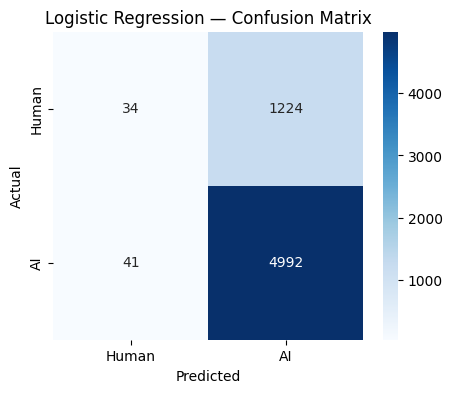

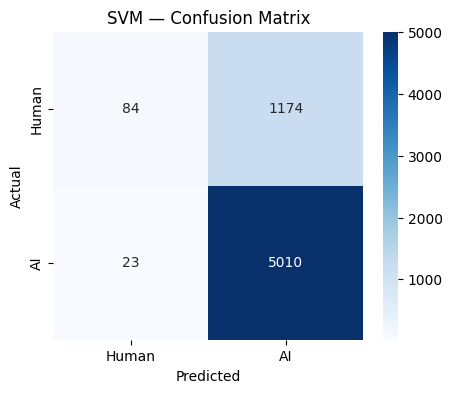

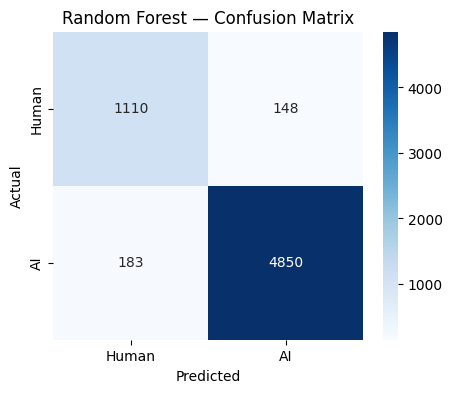

In [267]:
def plot_conf_matrix(y_true, y_pred, title):
    """
    Draw a confusion matrix heatmap for model predictions.

    Parameters
    ----------
    y_true : array-like
        Ground truth labels.
    y_pred : array-like
        Predicted labels from the model.
    title : str
        Title displayed above the plot (usually model name).

    Output
    ------
    Displays a heatmap showing:
        - True Positive / True Negative counts
        - False Positive / False Negative counts
    For classes → ['human','ai_generated']
    """
    
    cm = confusion_matrix(y_true, y_pred, labels=["human", "ai_generated"])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Human","AI"], yticklabels=["Human","AI"])
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_conf_matrix(y_test, pred_lr, "Logistic Regression — Confusion Matrix")
plot_conf_matrix(y_test, pred_svm, "SVM — Confusion Matrix")
plot_conf_matrix(y_test, pred_rf, "Random Forest — Confusion Matrix")

### Task 5.1: Compare the results of all models. Discuss why certain models might have performed better than others.

In my test shows that Random Forest is the best model because of:
- Captures Non-Linear Relationships
- Handles Feature Imbalance & Noise Better

### Task 5.2: For the best-performing traditional model, extract and visualize feature importances/coefficients to understand what features are most indicative of AI-generated text.

In [ ]:
def plot_feature_importances(model, feature_names):
    """
    Plot feature importances for a Random Forest model.
    Automatically adjusts to the number of features provided.

    Parameters
    ----------
    model : RandomForestClassifier
        Trained Random Forest model.
    feature_names : list
        Names of your features.
    """

    importances = model.feature_importances_

    # Sort by importance (descending)
    sorted_idx = np.argsort(importances)[::-1]

    # Select only existing features
    sorted_features = np.array(feature_names)[sorted_idx]
    sorted_importances = importances[sorted_idx]

    # Print
    print("\nFeature Importances:")
    for name, score in zip(sorted_features, sorted_importances):
        print(f"{name}: {score:.4f}")

    # Plot
    plt.figure(figsize=(7, 4))
    plt.barh(sorted_features[::-1], sorted_importances[::-1])
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("Random Forest Feature Importances")
    plt.tight_layout()
    plt.show()

In [278]:
model.feature_importances_

array([0.49470894, 0.26032026, 0.15828431, 0.08668649])


Feature Importances:
entity_density: 0.4947
genitive_count: 0.2603
honore_r: 0.1583
noun_count: 0.0867


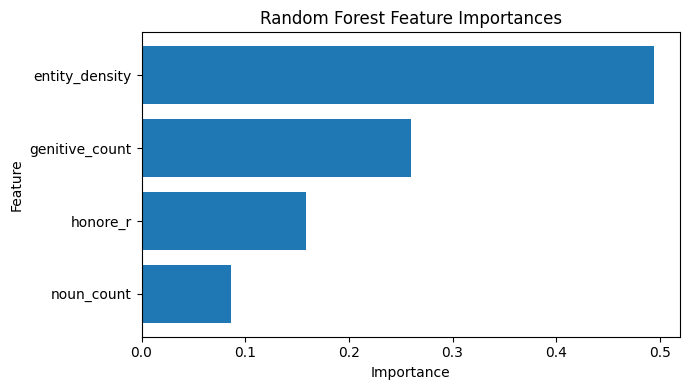

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
rf_model = rf_best
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec   = vectorizer.transform(X_val)
feature_names = vectorizer.get_feature_names_out()  

plot_feature_importances(rf_model, feature_names)

In [282]:
import os
import joblib
def save_model(model, name, folder="models"):
    """
    Save any trained machine learning model to disk using joblib.

    Parameters:
        model: trained ML model (sklearn estimator)
        name (str): file name (without extension)
        folder (str): target directory for saving
    """
    os.makedirs(folder, exist_ok=True)
    path = os.path.join(folder, f"{name}.joblib")
    joblib.dump(model, path)
    print(f"Model saved to: {path}")

In [283]:
save_model(log_reg, "logistic_regression")
save_model(svm_best, "svm")
save_model(rf_model, "random_forest")

Model saved to: models/logistic_regression.joblib
Model saved to: models/svm.joblib
Model saved to: models/random_forest.joblib
